In [1]:
%pip install pykan
%pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.9

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d obulisainaren/retinal-oct-c8
!unzip retinal-oct-c8.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open retinal-oct-c8.zip, retinal-oct-c8.zip.zip or retinal-oct-c8.zip.ZIP.


In [5]:
import os

# Correct dataset paths
base_dir = '/kaggle/input/retinal-oct-c8/RetinalOCT_Dataset/RetinalOCT_Dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

# Confirm folders
print("Train categories:", os.listdir(train_dir))
print("Validation categories:", os.listdir(val_dir))
print("Test categories:", os.listdir(test_dir))
import os

def count_images(dir_path):
    total = 0
    for cls in os.listdir(dir_path):
        cls_path = os.path.join(dir_path, cls)
        # only count files (skip any stray subdirs)
        files = [f for f in os.listdir(cls_path)
                 if os.path.isfile(os.path.join(cls_path, f))]
        total += len(files)
    return total


print(f"Training images:   {count_images(train_dir)}")
print(f"Validation images: {count_images(val_dir)}")
print(f"Test images:       {count_images(test_dir)}")



Train categories: ['DR', 'AMD', 'CSR', 'DRUSEN', 'CNV', 'NORMAL', 'MH', 'DME']
Validation categories: ['DR', 'AMD', 'CSR', 'DRUSEN', 'CNV', 'NORMAL', 'MH', 'DME']
Test categories: ['DR', 'AMD', 'CSR', 'DRUSEN', 'CNV', 'NORMAL', 'MH', 'DME']
Training images:   18400
Validation images: 2800
Test images:       2800


Categories: ['DR', 'AMD', 'CSR', 'DRUSEN', 'CNV', 'NORMAL', 'MH', 'DME']
Selected Category: NORMAL


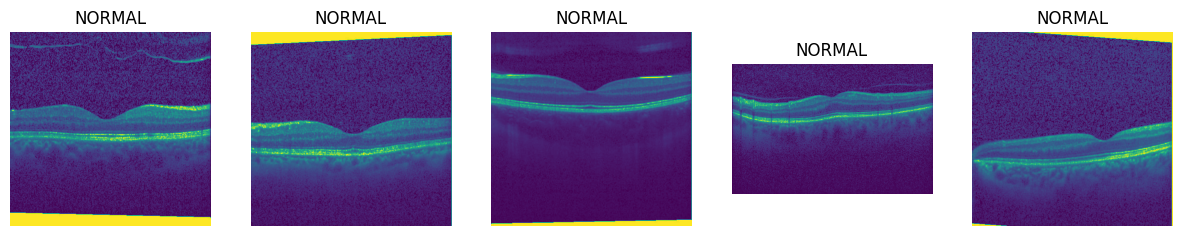

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Choose which dataset you want to visualize
dataset_dir = train_dir  # Or val_dir, test_dir

# List categories
categories = os.listdir(dataset_dir)
print("Categories:", categories)

# Pick a random category
selected_category = random.choice(categories)
print("Selected Category:", selected_category)

# List images
category_path = os.path.join(dataset_dir, selected_category)
images = os.listdir(category_path)

# Pick 5 random images
sample_images = random.sample(images, 5)

# Plot
plt.figure(figsize=(15, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(category_path, img_name)
    img = Image.open(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(selected_category)
plt.show()


In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),#converts a PIL IMG- numpy array  to a pytorch tensor cwh order
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225)),
])
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225)),
])

# Datasets and Loaders
batch_size = 64

#apply the transforms
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
val_dataset   = datasets.ImageFolder(root=val_dir,   transform=transform_test)
test_dataset  = datasets.ImageFolder(root=test_dir,  transform=transform_test)
#feed data in batches to train-eval,scan train_dir and sort alphabetically
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import math
from torchsummary import summary
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import OneCycleLR

In [13]:
#combines a standard linear transformation with a learnable ,spline,

#a small grid of knots points and learns spline coefficitents so that for each input feature
#the layer can adaptively wrap the activation function itself

#in/out feature =like nn.linar--i/o dims
#grid=num of spline segments
#spline order=degree of bspline--3
#scale=for scaling factors for initialization
#base activation=took "silu" as default nonlinearity before the base linear transformation
#grid range=interval over which splines operate

class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__() #initialize parent nn.module
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        #compute the initial uniform knot grid
        h = (grid_range[1] - grid_range[0]) / grid_size #step size=interval length/per segments
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid) #store grid so it moves with the module-gpu but isnt  a learnable parameter

        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))#same as nn.linear weight
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))#one set of spline coeff per o/i pair
        if enable_standalone_scale_spline:#optional per pair scale factor on the spline term
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()#initialize weight and spline coeff

    def reset_parameters(self):#init for base linear weights scaled by scale_base
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            #Create small random perturbations for initializing the spline coefficients
            #then Project those random perturbations onto the B-spline basis via curve2coeff (least squares solve) and store in spline_weight
            #Perturbations = tiny random offsets around zero used to initialize the spline part.
            #Why: if we started our spline coefficients all exactly zero
            # the network might never learn a non-zero spline correction (“dead” parameters). A small random start breaks symmetry and encourages the spline to adapt during training.
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 1 / 2) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)
            #Optionally initialize the per-pair spline scalers.


    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            #de boors recursive formula for b spline
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()


    #least sq solve for spline coeff c such that A.c~~B giving minimal error
    #solve A·c ≈ noise in least squares sense, where A is the B-spline basis matrix evaluated at grid positions. The result c are the actual spline weights.


    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property #applies the learned per pair scaler-if enabled to the raw spline coeff
    def scaled_spline_weight(self):
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)


    #apply base activation(base=silu) and a standard linaer layer
    #compute b spline on each feature, flatten them then linearly combine with the spline coeff

    #the sum of the base linaer term and the spline based non linaer correction
    def forward(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    #adaptively refines the knot positions (self.grid) based on the distribution of x
    #recomputes spline weights so that the current layer remains unchanged under the new grid
    #encourages the grid to align with dense regions in the data, improving expressiveness
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))


    #penalty on spline weights -- sparsity /activation cost
    #entropy of the L1 distribution--encourages diversity in which features use splines
    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


In [47]:
class VGG_KAN(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        vgg = models.vgg16_bn(pretrained=True)
        self.features = vgg.features
        flat_dim = 512 * 7 * 7
        self.kan1 = KANLinear(flat_dim, 512)
        self.kan2 = KANLinear(512, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.kan1(x))
        return self.kan2(x)

class MobileNet_KAN(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        mob = models.mobilenet_v2(pretrained=True)
        self.features = mob.features
        self.pool = nn.AdaptiveAvgPool2d(1)
        dim = mob.last_channel
        self.kan = KANLinear(dim, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x).view(x.size(0), -1)
        return self.kan(x)

class ResNet_KAN(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        res = models.resnet50(pretrained=True)
        res.fc = KANLinear(res.fc.in_features, num_classes)
        self.model = res

    def forward(self, x):
        return self.model(x)

class DenseNet_KAN(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        den = models.densenet121(pretrained=True)
        in_feat = den.classifier.in_features
        den.classifier = KANLinear(in_feat, num_classes)
        self.model = den

    def forward(self, x):
        return self.model(x)

In [48]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import OneCycleLR
from torch.utils.data import DataLoader
from torchvision import models
from torchsummary import summary
import matplotlib.pyplot as plt
from tqdm import tqdm



--- VGG_KAN Summary ---
Layer (type:depth-idx)                   Output Shape              Param #
DataParallel                             [1, 8]                    --
├─VGG_KAN: 1-1                           [1, 8]                    143,214,656
├─VGG_KAN: 1-2                           --                        --
│    └─Sequential: 2-1                   [1, 512, 7, 7]            14,723,136
│    └─Sequential: 2-2                   --                        --
│    │    └─Conv2d: 3-1                  [1, 64, 224, 224]         1,792
│    │    └─BatchNorm2d: 3-2             [1, 64, 224, 224]         128
│    │    └─ReLU: 3-3                    [1, 64, 224, 224]         --
│    │    └─Conv2d: 3-4                  [1, 64, 224, 224]         36,928
│    │    └─BatchNorm2d: 3-5             [1, 64, 224, 224]         128
│    │    └─ReLU: 3-6                    [1, 64, 224, 224]         --
│    │    └─MaxPool2d: 3-7               [1, 64, 112, 112]         --
│    │    └─Conv2d: 3-8           

/tmp/ipykernel_31/1407622804.py:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f'{name}_best.pth', map_location=device)


vgg_kan Test | Loss 0.0879 Acc 97.11%


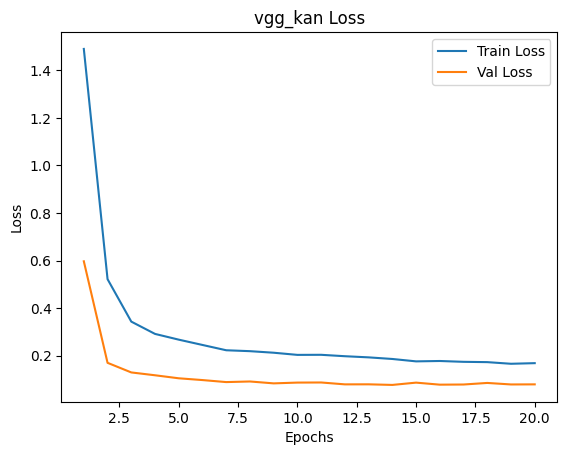

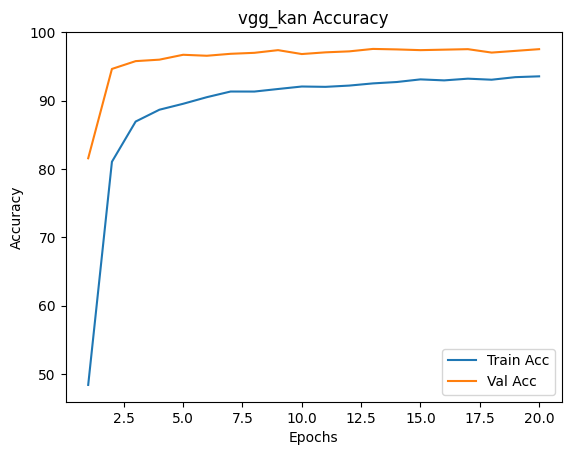


=== Training mobilenet_kan ===
Ep 1/20 | TLoss 0.8601 TAcc 69.09% | VLoss 0.2734 VAcc 90.57% | Time 162.3s
Ep 2/20 | TLoss 0.4003 TAcc 84.73% | VLoss 0.1744 VAcc 94.11% | Time 160.7s
Ep 3/20 | TLoss 0.3253 TAcc 87.54% | VLoss 0.1632 VAcc 94.04% | Time 162.7s
Ep 4/20 | TLoss 0.3027 TAcc 88.07% | VLoss 0.1332 VAcc 95.29% | Time 162.5s
Ep 5/20 | TLoss 0.2793 TAcc 89.28% | VLoss 0.1255 VAcc 95.36% | Time 161.2s
Ep 6/20 | TLoss 0.2690 TAcc 89.85% | VLoss 0.1108 VAcc 95.89% | Time 160.3s
Ep 7/20 | TLoss 0.2525 TAcc 90.31% | VLoss 0.1105 VAcc 96.00% | Time 158.7s
Ep 8/20 | TLoss 0.2474 TAcc 90.55% | VLoss 0.1102 VAcc 96.00% | Time 160.1s
Ep 9/20 | TLoss 0.2332 TAcc 90.83% | VLoss 0.0998 VAcc 96.43% | Time 159.1s
Ep 10/20 | TLoss 0.2252 TAcc 91.43% | VLoss 0.0942 VAcc 96.96% | Time 159.3s
Ep 11/20 | TLoss 0.2215 TAcc 91.40% | VLoss 0.0917 VAcc 96.54% | Time 158.4s
Ep 12/20 | TLoss 0.2158 TAcc 91.65% | VLoss 0.0969 VAcc 96.64% | Time 159.7s
Ep 13/20 | TLoss 0.2092 TAcc 91.83% | VLoss 0.0986 VA

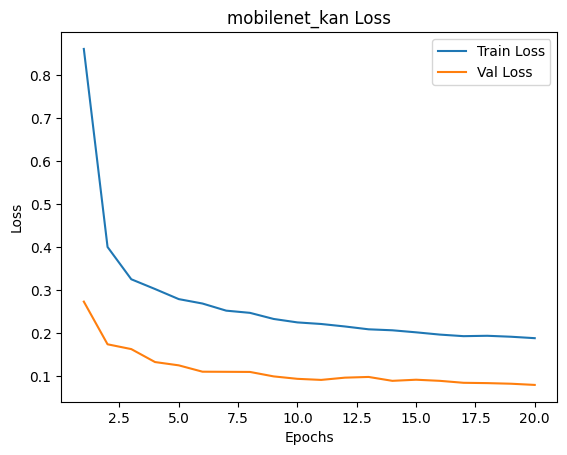

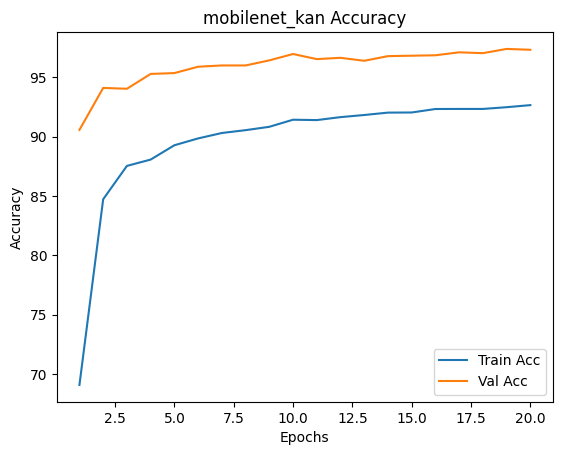


=== Training resnet_kan ===
Ep 1/20 | TLoss 0.9436 TAcc 67.52% | VLoss 0.2455 VAcc 91.93% | Time 230.5s
Ep 2/20 | TLoss 0.3650 TAcc 86.32% | VLoss 0.1494 VAcc 95.04% | Time 230.8s
Ep 3/20 | TLoss 0.3012 TAcc 88.64% | VLoss 0.1184 VAcc 95.86% | Time 231.3s
Ep 4/20 | TLoss 0.2705 TAcc 89.70% | VLoss 0.1079 VAcc 96.18% | Time 230.9s
Ep 5/20 | TLoss 0.2518 TAcc 90.27% | VLoss 0.0973 VAcc 96.61% | Time 230.9s
Ep 6/20 | TLoss 0.2335 TAcc 91.17% | VLoss 0.0936 VAcc 96.89% | Time 233.1s
Ep 7/20 | TLoss 0.2248 TAcc 91.41% | VLoss 0.0889 VAcc 96.93% | Time 235.9s
Ep 8/20 | TLoss 0.2180 TAcc 91.74% | VLoss 0.0837 VAcc 96.93% | Time 234.7s
Ep 9/20 | TLoss 0.2089 TAcc 91.93% | VLoss 0.0906 VAcc 96.96% | Time 233.1s
Ep 10/20 | TLoss 0.2015 TAcc 92.20% | VLoss 0.0809 VAcc 97.07% | Time 232.9s
Ep 11/20 | TLoss 0.1947 TAcc 92.73% | VLoss 0.0881 VAcc 97.00% | Time 233.0s
Ep 12/20 | TLoss 0.1914 TAcc 92.41% | VLoss 0.0722 VAcc 97.46% | Time 232.9s
Ep 13/20 | TLoss 0.1832 TAcc 92.96% | VLoss 0.0743 VAcc 

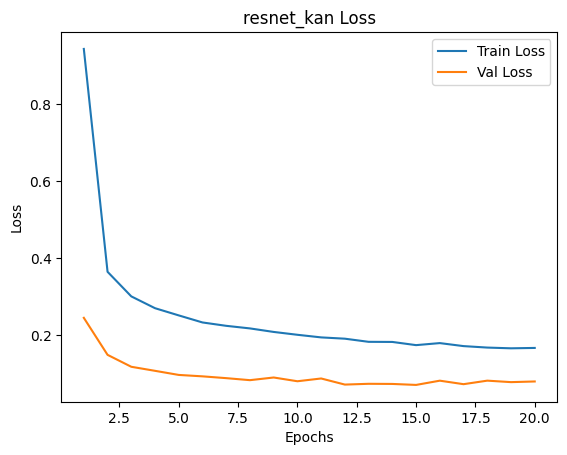

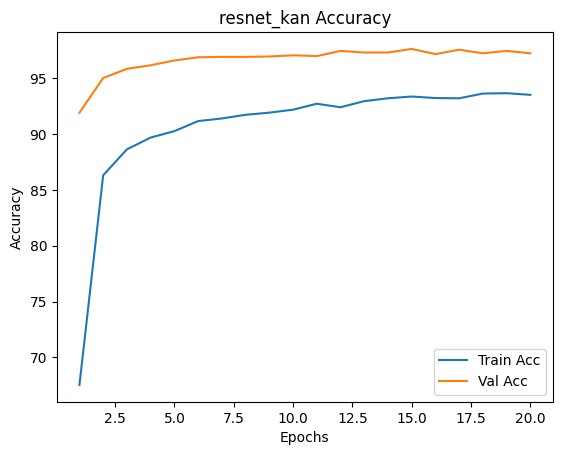


=== Training densenet_kan ===
Ep 1/20 | TLoss 0.8190 TAcc 71.51% | VLoss 0.2006 VAcc 94.32% | Time 241.7s
Ep 2/20 | TLoss 0.3521 TAcc 86.68% | VLoss 0.1350 VAcc 95.82% | Time 239.2s
Ep 3/20 | TLoss 0.2925 TAcc 89.07% | VLoss 0.1252 VAcc 96.14% | Time 238.3s
Ep 4/20 | TLoss 0.2609 TAcc 90.15% | VLoss 0.1046 VAcc 96.75% | Time 241.4s
Ep 5/20 | TLoss 0.2396 TAcc 90.84% | VLoss 0.0882 VAcc 97.07% | Time 241.3s
Ep 6/20 | TLoss 0.2377 TAcc 90.91% | VLoss 0.0914 VAcc 96.96% | Time 241.5s
Ep 7/20 | TLoss 0.2251 TAcc 91.39% | VLoss 0.0959 VAcc 96.57% | Time 239.8s
Ep 8/20 | TLoss 0.2117 TAcc 91.79% | VLoss 0.0921 VAcc 96.82% | Time 238.0s
Ep 9/20 | TLoss 0.2118 TAcc 91.86% | VLoss 0.0860 VAcc 96.82% | Time 238.4s
Ep 10/20 | TLoss 0.2014 TAcc 92.38% | VLoss 0.0798 VAcc 97.14% | Time 239.1s
Ep 11/20 | TLoss 0.1967 TAcc 92.32% | VLoss 0.0880 VAcc 97.07% | Time 236.4s
Ep 12/20 | TLoss 0.1934 TAcc 92.71% | VLoss 0.0771 VAcc 97.64% | Time 236.9s
Ep 13/20 | TLoss 0.1850 TAcc 92.77% | VLoss 0.0780 VAc

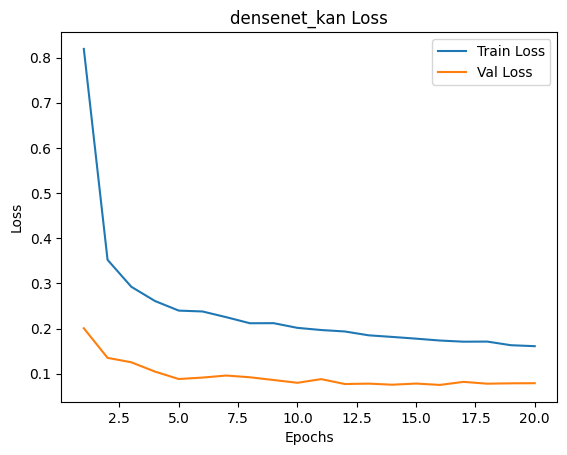

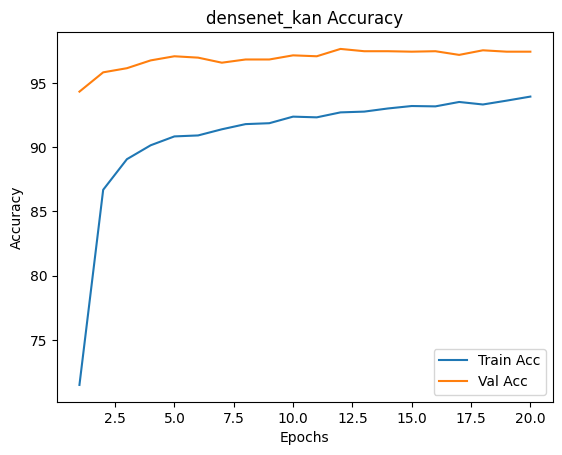

In [59]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
from torchinfo import summary
from tqdm import tqdm
import matplotlib.pyplot as plt



#Setup Device & Dataloaders
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#Initialize & Inspect Models

models_dict = {
    'vgg_kan': VGG_KAN(8),
    'mobilenet_kan': MobileNet_KAN(8),
    'resnet_kan': ResNet_KAN(8),
    'densenet_kan': DenseNet_KAN(8),
}

for name, model in models_dict.items():
    model = model.to(device)
    if torch.cuda.device_count() > 1:
        model = nn.DataParallel(model)
    models_dict[name] = model

    # 1.Full-depth summary to reveal KAN parameters
    print(f"\n--- {name.upper()} Summary ---")
    summary(
        model,
        input_size=(1, 3, 224, 224),   # include batch dimension
        verbose=1,                      # show all layers
        depth=10                        # sufficient depth
    )

    # 2. Manual check for each KANLinear module
    print(f"\nChecking KANLinear modules in {name}:")
    for mod_name, module in model.named_modules():
        if isinstance(module, KANLinear):
            print(f"  KANLinear at '{mod_name}':")
            for p_name, p in module.named_parameters():
                print(
                    f"    {p_name}: shape={tuple(p.shape)}, "
                    f"requires_grad={p.requires_grad}, numel={p.numel()}"
                )

    # Count total trainable parameters
    total_params = sum(
        p.numel() for p in model.parameters() if p.requires_grad
    )
    print(f"Total Trainable Parameters (including KAN layers): {total_params:,}\n")

#Training Utilities
criterion = nn.CrossEntropyLoss()

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, correct = 0.0, 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
        correct += logits.argmax(1).eq(y).sum().item()
    return total_loss / len(loader.dataset), 100 * correct / len(loader.dataset)


def eval_model(model, loader, criterion, device):
    model.eval()
    loss, correct = 0.0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            loss += criterion(logits, y).item() * x.size(0)
            correct += logits.argmax(1).eq(y).sum().item()
    return loss / len(loader.dataset), 100 * correct / len(loader.dataset)

#Run Training for All Models
epochs = 20
results = {name: {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
           for name in models_dict.keys()}

for name, model in models_dict.items():
    print(f"\n=== Training {name} ===")
    optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=5e-4)
    scheduler = OneCycleLR(
        optimizer,
        max_lr=1e-2,
        steps_per_epoch=len(train_loader),
        epochs=epochs
    )
    best_val, wait = float('inf'), 0
    patience = 10

    for ep in range(1, epochs + 1):
        t0 = time.time()
        tr_loss, tr_acc = train_one_epoch(model, train_loader,
                                         optimizer, criterion, device)
        val_loss, val_acc = eval_model(model, val_loader,
                                      criterion, device)
        scheduler.step()
        results[name]['train_loss'].append(tr_loss)
        results[name]['train_acc'].append(tr_acc)
        results[name]['val_loss'].append(val_loss)
        results[name]['val_acc'].append(val_acc)

        print(
            f"Ep {ep}/{epochs} | TLoss {tr_loss:.4f} TAcc {tr_acc:.2f}% | "
            f"VLoss {val_loss:.4f} VAcc {val_acc:.2f}% | Time {time.time()-t0:.1f}s"
        )

        if val_loss < best_val:
            best_val, wait = val_loss, 0
            torch.save(model.state_dict(), f'{name}_best.pth')
        else:
            wait += 1
            if wait >= patience:
                print("Early stop")
                break

    # Evaluate on test set
    model.load_state_dict(
        torch.load(f'{name}_best.pth', map_location=device)
    )
    test_loss, test_acc = eval_model(model, test_loader,
                                     criterion, device)
    print(f"{name} Test | Loss {test_loss:.4f} Acc {test_acc:.2f}%")

    # Plot metrics
    plt.figure()
    plt.plot(
        range(1, len(results[name]['train_loss']) + 1),
        results[name]['train_loss'], label='Train Loss'
    )
    plt.plot(
        range(1, len(results[name]['val_loss']) + 1),
        results[name]['val_loss'], label='Val Loss'
    )
    plt.title(f"{name} Loss")
    plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.show()

    plt.figure()
    plt.plot(
        range(1, len(results[name]['train_acc']) + 1),
        results[name]['train_acc'], label='Train Acc'
    )
    plt.plot(
        range(1, len(results[name]['val_acc']) + 1),
        results[name]['val_acc'], label='Val Acc'
    )
    plt.title(f"{name} Accuracy")
    plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

In [1]:
print('a')

a


In [6]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) Prepare a container for summary rows
summary_rows = []

# 2) Re-run each model’s test evaluation & gather metrics
for name, model in models_dict.items():
    # load best weights
    model.load_state_dict(torch.load(f'{name}_best.pth', map_location=device))
    # final train/val values (last epoch)
    final_tr_loss = results[name]['train_loss'][-1]
    final_tr_acc  = results[name]['train_acc'][-1]
    final_vl_loss = results[name]['val_loss'][-1]
    final_vl_acc  = results[name]['val_acc'][-1]
    # test eval
    test_loss, test_acc = eval_model(model, test_loader, criterion, device)
    # param count
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    # append to table
    summary_rows.append({
        'Model':         name,
        'Params':        total_params,
        'Train Loss':    final_tr_loss,
        'Train Acc (%)': final_tr_acc,
        'Val Loss':      final_vl_loss,
        'Val Acc (%)':   final_vl_acc,
        'Test Loss':     test_loss,
        'Test Acc (%)':  test_acc,
    })

    # compute full confusion matrix for test set
    y_true, y_pred = [], []
    model.eval()
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            preds = logits.argmax(dim=1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# 3) Build and print the summary table
df = pd.DataFrame(summary_rows)
df = df[['Model','Params','Train Loss','Train Acc (%)',
         'Val Loss','Val Acc (%)','Test Loss','Test Acc (%)']]

print("\n=== All Models at a Glance ===")
print(df.to_markdown(index=False))


NameError: name 'VGG_KAN' is not defined

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from torchvision import transforms
from google.colab import files  # Import the necessary module for file uploads in Colab

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load and preprocess uploaded image
def load_and_preprocess_image(img_bytes):
    img = Image.open(BytesIO(img_bytes)).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    return img, img_tensor

# Predict and Display
def predict_and_display(img, img_tensor, true_class):
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        prob = torch.softmax(output, dim=1).cpu().numpy().flatten()
        predicted_class = np.argmax(prob)

    # Get class name from the predicted class index
    predicted_class_name = class_names[predicted_class]

    # Display the image with predicted class and confidence
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(f"True: {true_class} | Predicted: {predicted_class_name} (Confidence: {prob[predicted_class]:.2f})")
    plt.show()

# Upload handler
def handle_upload():
    uploaded = files.upload()  # This works in Google Colab
    for name, data in uploaded.items():
        img, img_tensor = load_and_preprocess_image(data)

        # Here, you will need the true class of the image
        # Assuming the file name contains the true class (for example 'class_name_image.jpg')
        true_class = name.split('_')[0]  # This depends on your file naming convention

        predict_and_display(img, img_tensor, true_class)

# Run upload + prediction
handle_upload()


In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from torchvision import transforms
from google.colab import files  # Import the necessary module for file uploads in Colab

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load and preprocess uploaded image
def load_and_preprocess_image(img_bytes):
    img = Image.open(BytesIO(img_bytes)).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    return img, img_tensor

# Predict and Display
def predict_and_display(img, img_tensor, true_class):
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        prob = torch.softmax(output, dim=1).cpu().numpy().flatten()
        predicted_class = np.argmax(prob)

    # Get class name from the predicted class index
    predicted_class_name = class_names[predicted_class]

    # Display the image with predicted class and confidence
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(f"True: {true_class} | Predicted: {predicted_class_name} (Confidence: {prob[predicted_class]:.2f})")
    plt.show()

# Upload handler
def handle_upload():
    uploaded = files.upload()  # This works in Google Colab
    for name, data in uploaded.items():
        img, img_tensor = load_and_preprocess_image(data)

        # Here, you will need the true class of the image
        # Assuming the file name contains the true class (for example 'class_name_image.jpg')
        true_class = name.split('_')[0]  # This depends on your file naming convention

        predict_and_display(img, img_tensor, true_class)

# Run upload + prediction
handle_upload()


KeyboardInterrupt: 